In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Practice/Datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# Find the most frequent category in the 'Gender' column
most_frequent_category = df['Pregnancies'].mode().iloc[0]

# Fill missing values in the 'Gender' column with the most frequent category
df['Pregnancies'].fillna(most_frequent_category, inplace=True)


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#k fold cross validation

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.svm import SVC
SVC_model = SVC(C=0.5, kernel='poly', degree=2, gamma='scale', coef0=0.0, tol=0.001, decision_function_shape="ovr" )

In [ ]:
SVC_model = SVC()

In [ ]:
x_train = None  # Your training data
y_train = None  # Your training labels

In [ ]:
# Separate features and labels
x_train = df[['Pregnancies', 'Glucose', 'BloodPressure']]
y_train = df['Outcome']

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import matplotlib.pyplot as plt

k_fold= KFold(10)  # Create a 10-fold cross-validation object

# Accuracy
accuracy= cross_val_score(SVC_model, x_train,y_train , cv= k_fold, scoring= 'accuracy')  #here i fall in problem, i have question.
print("Accuracy:", accuracy.mean())

# Precision
precision= cross_val_score(SVC_model, x_train,y_train , cv= k_fold, scoring= 'precision')
print("Precision:", precision.mean())

# Recall
recall= cross_val_score(SVC_model, x_train, y_train , cv= k_fold, scoring= 'recall')
print("Recall:", recall.mean())

# F1 Score
f1_score = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='f1')
print("F1 Score:", f1_score.mean())

# AUC
auc_score = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='roc_auc')
print("AUC:", auc_score.mean())

Accuracy: 0.7538619275461381
Precision: 0.7447757372486474
Recall: 0.43934441756500575
F1 Score: 0.5502516491705922
AUC: 0.7938448519974484


In [ ]:
from statistics import mean

In [ ]:
accuracy

array([0.71428571, 0.77922078, 0.72727273, 0.64935065, 0.76623377,
       0.80519481, 0.83116883, 0.79220779, 0.76315789, 0.71052632])

In [ ]:
# Calculate the overall accuracy by taking the mean of the accuracy list
overall_accuracy = mean(accuracy)

# Print the overall accuracy
print(overall_accuracy)

0.7538619275461381


In [ ]:
precision

array([0.77777778, 0.72727273, 0.84210526, 0.58823529, 0.76470588,
       1.        , 0.54545455, 0.76470588, 0.6875    , 0.75      ])

In [ ]:
# Calculate the overall precision by taking the mean of the precision list
overall_precision = mean(precision)

# Print the overall precision
print(overall_precision)

0.7447757372486474


In [ ]:
recall

array([0.4375    , 0.36363636, 0.47058824, 0.33333333, 0.48148148,
       0.5       , 0.42857143, 0.52      , 0.45833333, 0.4       ])

In [ ]:
# Calculate the overall recall by taking the mean of the recall list
overall_recall = mean(recall)

# Print the overall recall
print(overall_recall)

0.4393444175650058


In [ ]:
f1_score

array([0.56      , 0.48484848, 0.60377358, 0.42553191, 0.59090909,
       0.66666667, 0.48      , 0.61904762, 0.55      , 0.52173913])

In [ ]:
# Calculate the overall f1_score by taking the mean of the f1_score list
overall_f1_score = mean(f1_score)

# Print the overall f1_score
print(overall_f1_score)

0.5502516491705921


In [ ]:
auc_score

array([0.69236111, 0.77768595, 0.80437756, 0.71631206, 0.81555556,
       0.82765957, 0.79931973, 0.87307692, 0.80528846, 0.82681159])

0.7938448519974484


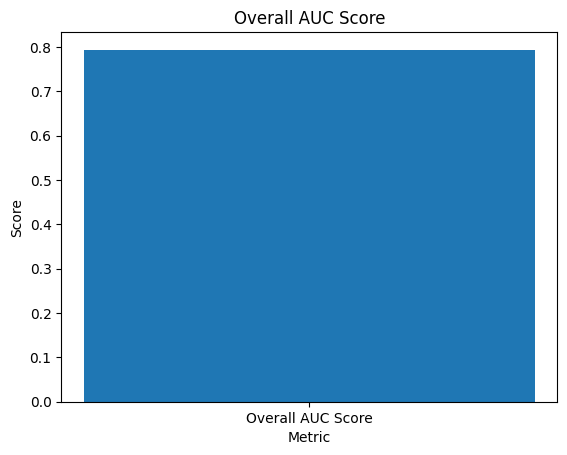

In [ ]:
# Calculate the overall auc_score by taking the mean of the auc_score list
overall_auc_score = mean(auc_score)

# Print the overall auc_score
print(overall_auc_score)

# Create a bar chart
plt.bar("Overall AUC Score", overall_auc_score)

# Add title and labels
plt.title("Overall AUC Score")
plt.xlabel("Metric")
plt.ylabel("Score")

# Display the bar chart
plt.show()

#K fold cross validation


In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTregressor= DecisionTreeRegressor(criterion=' squared _error',
max_depth= 10,
min_samples_split= 2,
min_samples_leaf= 1,
max_features= None,
max_leaf_nodes= None,
min_impurity_decrease=0.0
)

In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure']]
y = df['Outcome']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

k_fold= KFold(10)  # Create a 10-fold cross-validation object
DTregressor = DecisionTreeRegressor()  #Define the DecisionTreeRegressor model

results1 = cross_val_score(DTregressor, X, y, cv=k_fold, scoring='neg_mean_squared_error')
results2 = cross_val_score(DTregressor, X, y, cv=k_fold, scoring='neg_mean_absolute_percentage_error')
results3 = cross_val_score(DTregressor, X, y, cv=k_fold, scoring='r2')

# Print the results
print("Negative Mean Squared Error:", results1.mean())
print("Negative Mean Absolute Percentage Error:", results2.mean())
print("R2:", results3.mean())


Negative Mean Squared Error: -0.33005809979494194
Negative Mean Absolute Percentage Error: -797749722100522.4
R2: -0.5695239689486911


In [ ]:
results1  #negative MSE

array([-0.41883117, -0.27272727, -0.31168831, -0.2987013 , -0.35064935,
       -0.32467532, -0.3538961 , -0.32467532, -0.31578947, -0.32894737])

In [ ]:
results2  #negative MAE

array([-8.48080449e+14, -7.01859682e+14, -4.67906455e+14, -7.01859682e+14,
       -8.18836296e+14, -5.84883068e+14, -1.25749860e+15, -8.18836296e+14,
       -1.06664202e+15, -7.11094678e+14])

In [ ]:
# Calculate the overall MAE percentage by taking the mean of the MAE list
overall_MAE_percentage = sum(results2) / len(results2)

# Print the overall MAE percentage
print(abs(overall_MAE_percentage)*100)

7.977497221005224e+16


In [ ]:
results3  #negative R2

In [ ]:
overall_R2= sum(results3) / len(results3)
print (overall_R2)

-0.5695239689486911


#Find supported metrics

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',